# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [91]:
## IMPORT YOUR LIBS HERE
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Text vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#ML helper functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Metrics
from sklearn import metrics

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [92]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
# 2. Print the shape
print(df.shape)
df.head()


(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [93]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())


id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [94]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [95]:
# 1. Make a function that makes all text lowercase.
def make_lower(a_string):
    return a_string.lower()


test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print(make_lower(test_string))


this is a sentence with lots of caps.


In [96]:
# 2. Make a function that removes all punctuation. 
def remove_punc(a_string):
    a_string = re.sub(r'[^\w\s]','', a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print(remove_punc(test_string))

This is a sentence 50 With lots of punctuation  other things


In [97]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string):
    words = word_tokenize(a_string)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    a_string = ' '.join(valid_words)
    return a_string

test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(remove_stopwords(test_string))

This sentence ! With different stopwords added .


In [98]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'



In [99]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punc(input_string)
    input_string = remove_stopwords(input_string)
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'played started playing players love play plays'

In [100]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
#df1 = df['message'].apply(text_pipeline)
df['message_clean'] = df['message'].apply(text_pipeline)

df.head()




,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [101]:
# 0. Define your `X` and `y` data. 
X = df['message_clean']
y = df['topic_category']


In [102]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Saves raw text for later incase
X_train_text = X_train
X_test_text = X_test

print(df.shape, len(X_train_text))


(11314, 5) 9051


In [103]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
TfidfVectorizer?
vectorizer = TfidfVectorizer()



Init signature:
TfidfVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.float64'>,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)
Docstring:     
Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to :class:`CountVectorizer` followed by
:class:`TfidfTransformer`.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : {'filename', 'file', 'content'}, default='content'
    If 'filename', the sequence passed as an argument to fit is
    expected to be a list of filenames that need reading to fetch
    the raw content to analyze.

    If 'file', the

In [104]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)



TfidfVectorizer()

In [105]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [106]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape, type(X_train))

# I have 121,888 columns.
# This is slightly less than what was returned in lecture file


(9051, 121888) <class 'scipy.sparse.csr.csr_matrix'>


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [107]:
# 1. Initalize an empty model. 
model = MultinomialNB()



In [108]:
# Fit our model with our training data.
model.fit(X_train, y_train)



MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [114]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)



In [110]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

# Should print 0.877
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.877154


AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

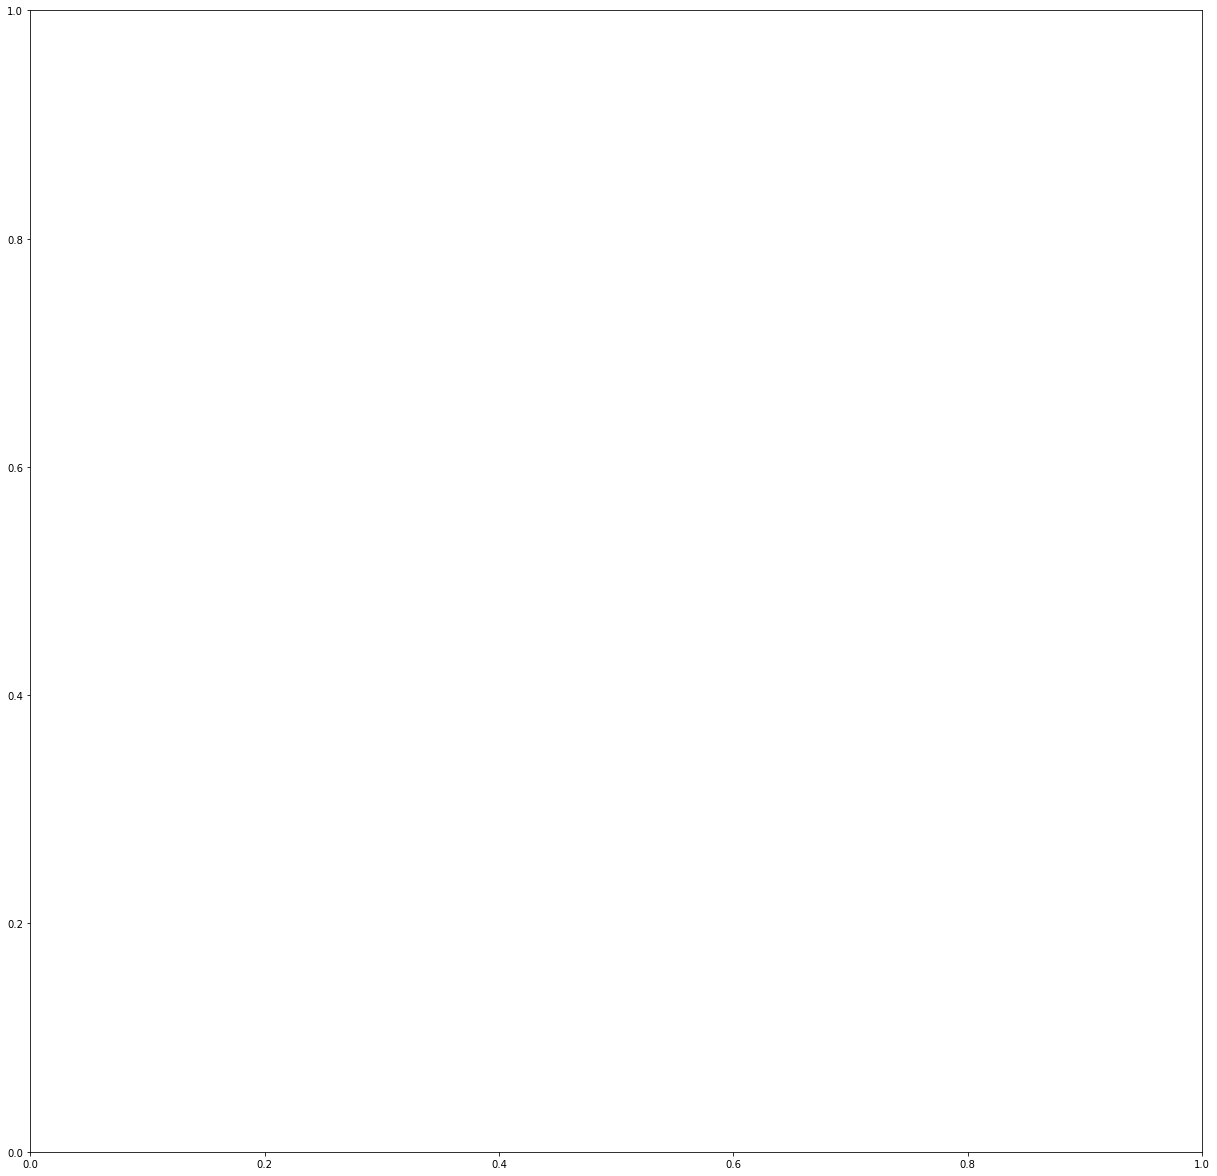

In [115]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [123]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.90      0.75      0.82        96
           comp.graphics       0.87      0.89      0.88       117
 comp.os.ms-windows.misc       0.85      0.86      0.85       118
comp.sys.ibm.pc.hardware       0.72      0.80      0.76       118
   comp.sys.mac.hardware       0.93      0.90      0.92       115
          comp.windows.x       0.91      0.89      0.90       119
            misc.forsale       0.85      0.68      0.76       117
               rec.autos       0.91      0.92      0.92       119
         rec.motorcycles       0.97      0.97      0.97       120
      rec.sport.baseball       0.97      0.95      0.96       119
        rec.sport.hockey       0.92      1.00      0.96       120
               sci.crypt       0.82      0.98      0.90       119
         sci.electronics       0.92      0.83      0.88       118
                 sci.med       0.97      0.96      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [125]:
my_sentence = "There are a lot of illegal guns on the street right now. The mayor better do something about it."

# 1. Apply the text pipeline to your sentence
text_pipeline(my_sentence)

# 2. Transform your clean[ed text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])
y = df['topic_category']
# 3. Use the model to predict your new `X`. 
model.fit(X, y)
# 4. Print the prediction


ValueError: Found input variables with inconsistent numbers of samples: [1, 11314]

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [ ]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')


